# Procesamiento de imágenes · Tarea 1

Esta tarea será una introducción al procesamiento de imágenes en Python con OpenCV y Numpy. Cargaremos una foto a color y en escala de grises, para luego segmentar el objeto principal y obtener información sobre este. Lograremos segmentar el avión, generando una imagen similar a la siguiente:

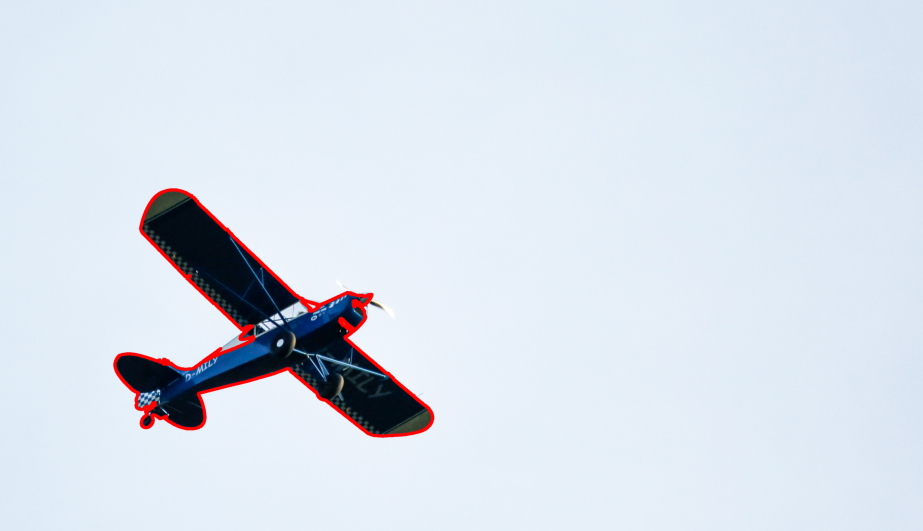

El programa está incompleto, por lo que deberás escribir tu propio código en las celdas que lo soliciten. Ejecuta las celdas en orden hasta llegar a una que debas rellenar. Una vez hayas escrito tu código, continúa ejecutando las celdas y asegúrate que no hayan alertas al correr los chequeos.

### Importante
* Lee atentamente las instrucciones y todo el código.
* Ejecuta las celdas en orden.
* Escribe tu código en las celdas que lo soliciten.
* Usa los nombres de variables que te pidan.
* Confirma que tu código esté correcto corriendo las celdas que dicen "Chequeo".
* Si el chequeo alerta que hay alguna variable incorrecta, vuelve atrás y arréglala. No hay penalización por esto.

## Configuración inicial

##### Importamos librerías

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import checker
import importlib

##### Aumentamos el tamaño de las imágenes

In [5]:
plt.rcParams['figure.dpi'] = 200

## Carga y visualización de la imagen

##### Cargamos la foto en escala de grises y a color

Extraeremos la información de la imagen en escala de grises, pero usaremos la imagen a color para visualizar algunos resultados.

In [6]:
img_path = 'plane.jpg'
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_color = cv2.imread(img_path, cv2.IMREAD_COLOR)[:, :, ::-1]

##### Mostramos la foto en escala de grises junto con información sobre ella 

La clase de la imagen es ndarray
La clase de cada pixel es uint8


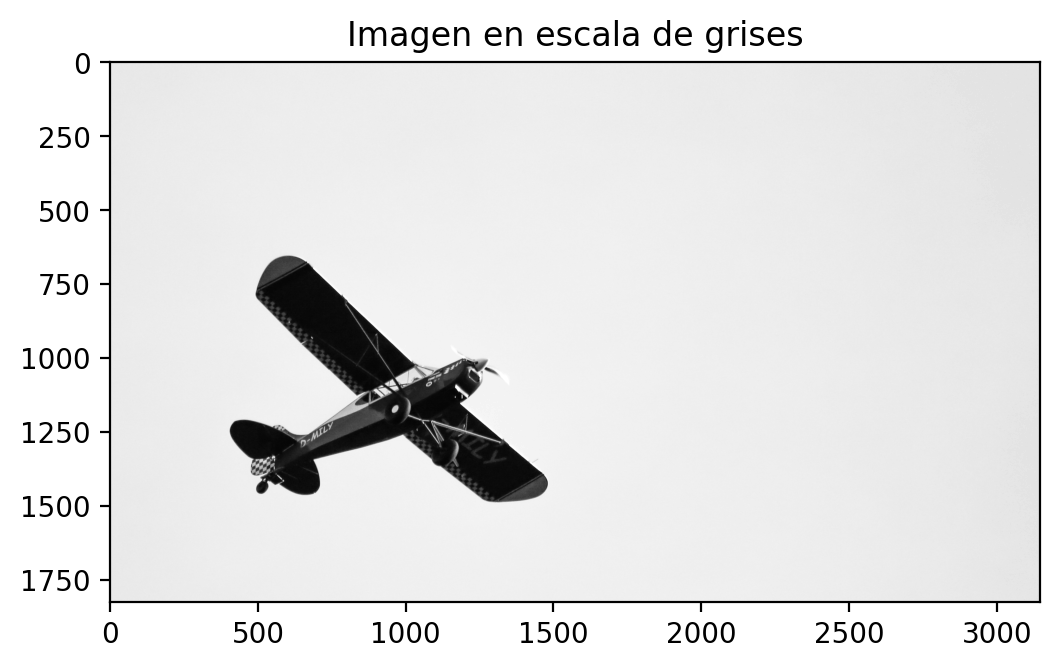

In [7]:
print(f'La clase de la imagen es {type(img_gray).__name__}')
print(f'La clase de cada pixel es {img_gray.dtype}')

plt.imshow(img_gray, cmap='gray')
plt.title('Imagen en escala de grises');

### Información sobre la imagen

Aprendamos un poco más sobre nuestra foto. **Tenemos que definir tres variables:**

* ```img_gray_shape```: una tupla que contenga las dimensiones de la imagen.
* ```img_gray_min```: el valor mínimo de la imagen.
* ```img_gray_max```: el valor máximo de la imagen.

Como nuestra foto es un ```ndarray```, tenemos funciones y parámetros que nos permiten obtener esta información rápidamente. En [esta](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) página puedes encontrar la información para obtener lo solicitado.

In [9]:
# Define img_gray_shape, img_gray_min y img_gray_max en las siguientes líneas
# Escribe tu código en las siguientes líneas
img_gray_shape = img_gray.shape
img_gray_min = img_gray.min()
img_gray_max = img_gray.max()

In [11]:
print(f'Las dimensiones de la imagen son {img_gray_shape}')
print(f'La intensidad del pixel más oscuro es {img_gray_min}')
print(f'La intensidad del pixel más claro es {img_gray_max}')

Las dimensiones de la imagen son (1825, 3147)
La intensidad del pixel más oscuro es 0
La intensidad del pixel más claro es 255


##### Chequeo

In [12]:
importlib.reload(checker)
assert checker.check_img_gray_shape(img_gray_shape)
assert checker.check_img_gray_min(img_gray_min)
assert checker.check_img_gray_max(img_gray_max)

Tamaño correcto. ¡Puedes seguir adelante!
Mínimo correcto. ¡Puedes seguir adelante!
Máximo correcto. ¡Puedes seguir adelante!


## Histograma

Un histograma es un gráfico que entrega el número de pixeles de la imagen para cada tono de gris.

Gran parte de nuestra foto corresponde a pixeles claros, es decir, intensidades altas. Al contrario, los pixeles pertenecientes al avión son más oscuros. Debido a esto, nuestro histograma tendrá dos grandes *peaks*.

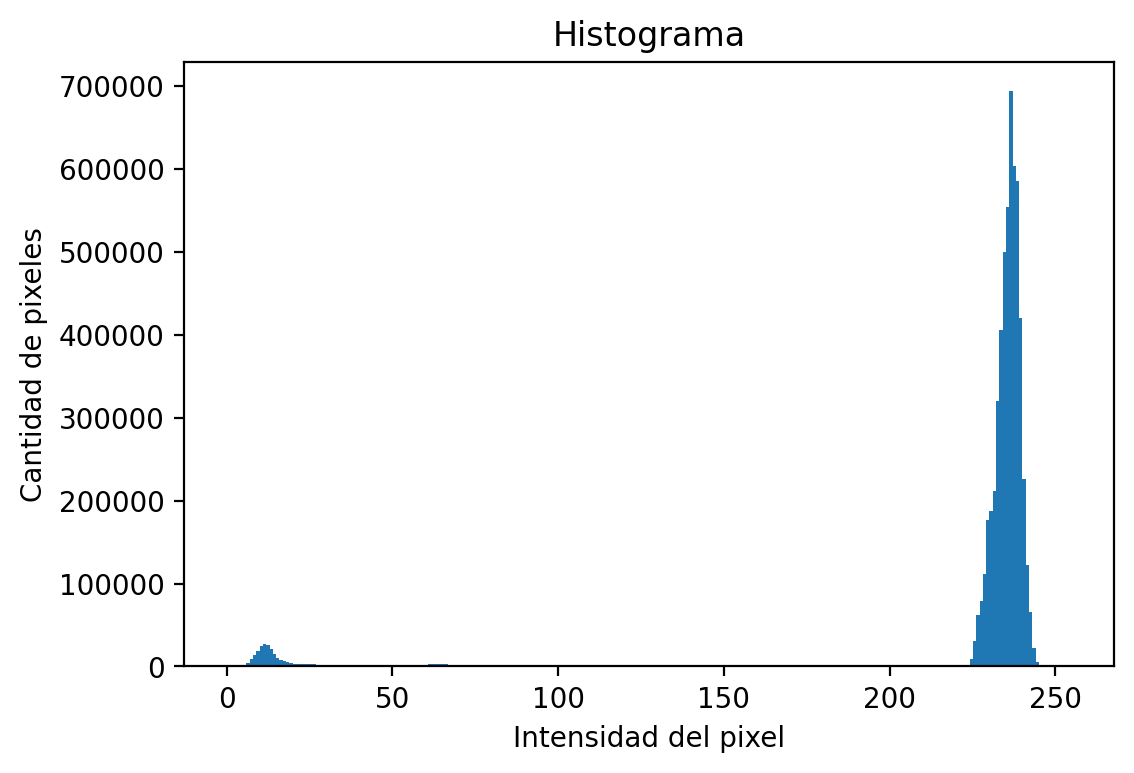

In [13]:
plt.hist(img_gray.ravel(), 256)
plt.title('Histograma')
plt.xlabel('Intensidad del pixel')
plt.ylabel('Cantidad de pixeles');

Podemos hacer *zoom* en el eje vertical para ver más detalle.

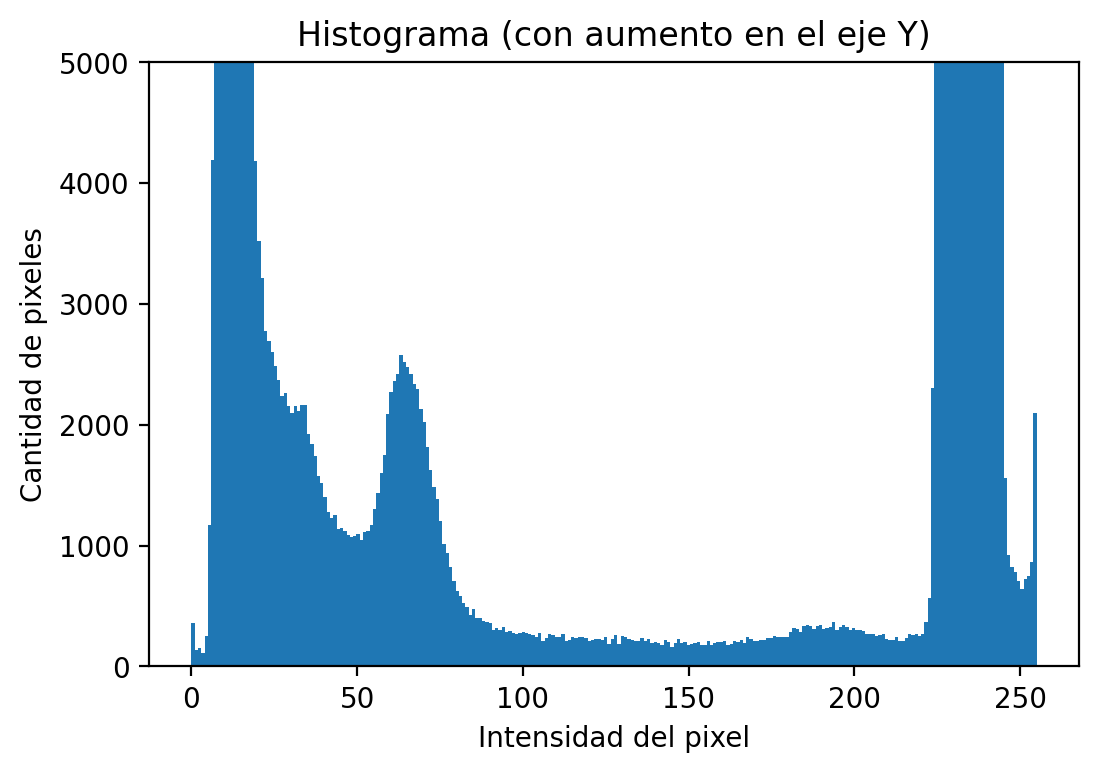

In [14]:
plt.hist(img_gray.ravel(), 256)
plt.ylim(0, 5000)
plt.title('Histograma (con aumento en el eje Y)')
plt.xlabel('Intensidad del pixel')
plt.ylabel('Cantidad de pixeles');

## Elección del umbral

Queremos escoger un umbral para determinar si un pixel pertenece al cielo o al avión. En el histograma anterior vimos *peaks* que representan las distintas partes de la foto, lo que nos puede ayudar a encontrar nuestro umbral.

**Define la variable ```threshold``` con un valor que segmente bien el avión.** Hay más de una respuesta correcta.

In [15]:
# Define threshold
# Escribe tu código en las siguientes líneas
threshold = 150

##### Chequeo

In [16]:
importlib.reload(checker)
assert checker.check_threshold(threshold)

Buen valor de umbral. ¡Puedes seguir adelante!


## Segmentación

Ahora que encontramos un buen umbral, lo usaremos para segmentar nuestra imagen. La función ```threshold``` de OpenCV fija cada pixel menor o igual al umbral en cero, y en un valor máximo en el caso contrario. Sin embargo, estamos pasando el parámetro ```THRESH_BINARY_INV``` en vez de ```THRESH_BINARY```, por lo que se invertirán los pixeles a la salida. Esto logra que el avión quede en blanco y el fondo en negro. 

In [18]:
img_bin = cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY_INV)[1]

La clase de la imagen es ndarray
La clase de cada pixel es uint8


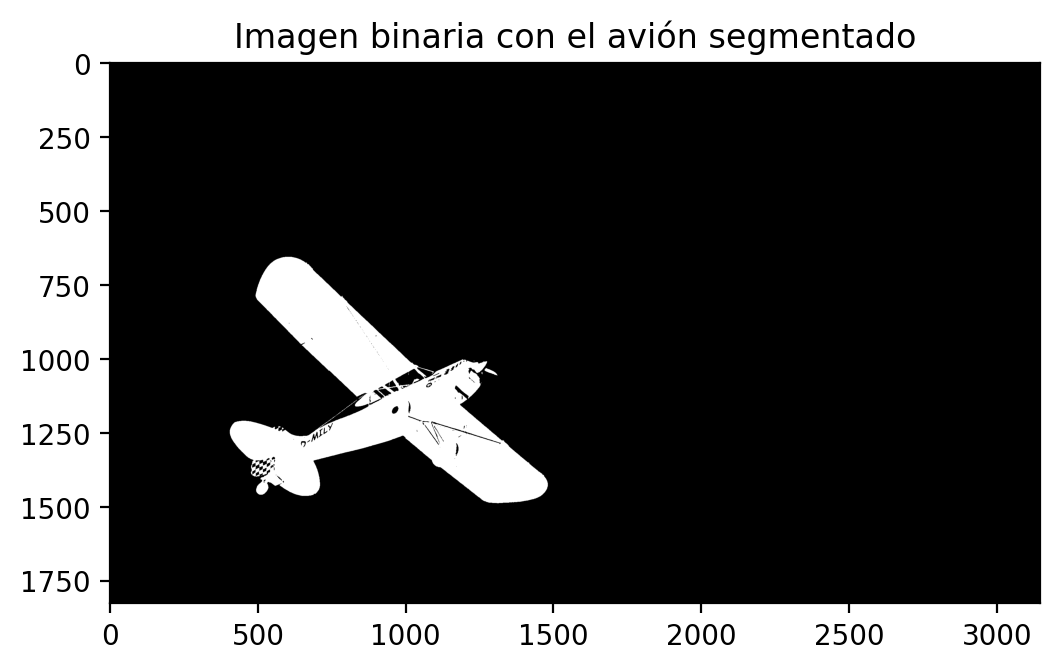

In [19]:
print(f'La clase de la imagen es {type(img_bin).__name__}')
print(f'La clase de cada pixel es {img_bin.dtype}')

plt.imshow(img_bin, cmap='gray')
plt.title('Imagen binaria con el avión segmentado');

### Información sobre la imagen

Estudiemos esta nueva imagen. **Definamos las mismas tres variables de antes, pero ahora para ```img_bin```:**

* ```img_bin_shape```: una tupla que contenga las dimensiones de la imagen.
* ```img_bin_min```: el valor mínimo de la imagen.
* ```img_bin_max```: el valor máximo de la imagen.

In [20]:
# Define img_bin_shape, img_bin_min y img_bin_max
# Escribe tu código en las siguientes líneas
img_bin_shape = img_bin.shape
img_bin_min = img_bin.min()
img_bin_max = img_bin.max()

In [21]:
print(f'Las dimensiones de la imagen son {img_bin_shape}')
print(f'La intensidad del pixel más oscuro es {img_bin_min}')
print(f'La intensidad del pixel más claro es {img_bin_max}')

Las dimensiones de la imagen son (1825, 3147)
La intensidad del pixel más oscuro es 0
La intensidad del pixel más claro es 255


##### Chequeo

In [22]:
importlib.reload(checker)
assert checker.check_img_bin_shape(img_bin_shape)
assert checker.check_img_bin_min(img_bin_min)
assert checker.check_img_bin_max(img_bin_max)

Tamaño correcto. ¡Puedes seguir adelante!
Mínimo correcto. ¡Puedes seguir adelante!
Máximo correcto. ¡Puedes seguir adelante!


## Cantidad de pixeles

Queremos estudiar un poco más detalladamente la imagen segmentada. Calculemos qué porcentaje de los pixeles corresponden al avión.

Calcular la **cantidad total de pixeles (```total_pixels```)** es fácil. Puedes usar las ya obtenidas dimensiones de la imagen.

También necesitamos conocer la **cantidad de pixeles de corresponden al avión (```plane_pixels```)**, es decir, que no valen cero. Numpy nos ayuda con una función para esto: ```count_nonzero```. [Aquí](https://numpy.org/doc/stable/reference/generated/numpy.count_nonzero.html) puedes encontrar más información sobre la función.

In [23]:
# Define plane_pixels y total_pixels
# Escribe tu código en las siguientes líneas
plane_pixels = np.count_nonzero(img_bin)
total_pixels = img_bin.size

In [25]:
print(f'Un {plane_pixels/total_pixels*100:.2f}% de los pixeles corresponden al avión ({plane_pixels} de {total_pixels})')

Un 5.62% de los pixeles corresponden al avión (322577 de 5743275)


##### Chequeo

In [26]:
importlib.reload(checker)
assert checker.check_plane_pixels(plane_pixels)
assert checker.check_total_pixels(total_pixels)

Cantidad de pixeles del avión correcta. ¡Puedes seguir adelante!
Cantidad total de pixeles correcta. ¡Puedes seguir adelante!


## *Bounding box*

Ahora que hemos determinado qué pixeles pertenecen al avión, podemos obtener un cuadro delimitador, o *bounding box*, que corresponde al rectángulo no rotado más pequeño que incluye todos los pixeles del avión.

Podemos obtener el _bounding box_ del avión a partir de nuestra imagen binaria usando la función ``boundingRect`` de OpenCV. En [esta](https://docs.opencv.org/4.5.2/dd/d49/tutorial_py_contour_features.html) página se explica cómo usarla.

**En el siguiente cuadro debes definir la coordenada de la esquina superior izquierda del rectángulo (``bbox_x``  y ``bbox_y``), junto con el ancho y alto de este (``bbox_w`` y ``bbox_h``).**

In [27]:
# Define bbox_x, bbox_y, bbox_w y bbox_h
# Escribe tu código en las siguientes líneas
bbox_x, bbox_y, bbox_w, bbox_h = cv2.boundingRect(img_bin)

Posición X: 405
Posición Y: 655
Ancho: 1075
Alto: 833


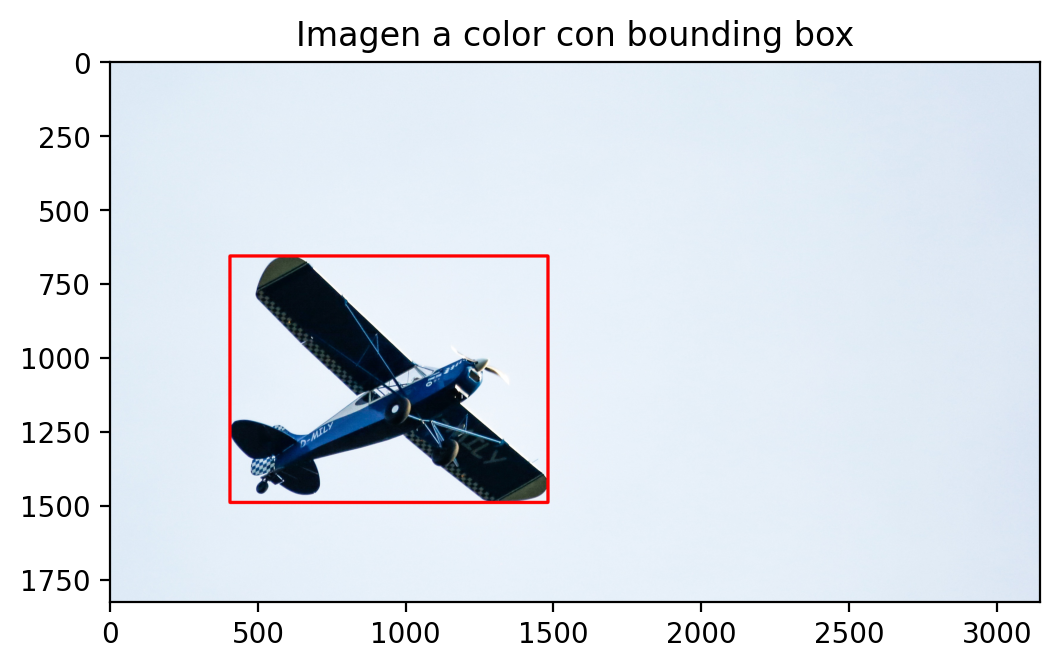

In [28]:
print(f'Posición X: {bbox_x}')
print(f'Posición Y: {bbox_y}')
print(f'Ancho: {bbox_w}')
print(f'Alto: {bbox_h}')

plt.imshow(cv2.rectangle(img_color.copy(), (bbox_x, bbox_y),(bbox_x + bbox_w, bbox_y + bbox_h), (255, 0, 0), 10))
plt.title('Imagen a color con bounding box');

##### Chequeo

In [29]:
importlib.reload(checker)
assert checker.check_bbox(bbox_x, bbox_y, bbox_w, bbox_h)

Calculaste el bounding box correctamente. ¡Puedes seguir adelante!


## Contorno

A partir de la imagen binaria también podemos obtener el contorno del avión. Esto nos permitirá hacer operaciones interesantes más adelante, como colocar una copia del avión en otra parte de la imagen.

Para obtener los **contornos del avión** podemos usar la función ``findContours``de OpenCV. Puedes encontrar información sobre esta función [aquí](https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html) y [aquí](https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0).

Usaremos la función de la siguiente forma:

```python
cv2.findContours(img_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
```

Esta nos retornará los arreglos ``contours`` y ``hierarchy``, pero para efectos de esta actividad solo nos interesa el primero. ``contours`` contiene todos los contornos encontrados en la imagen. En este caso aparecerán varios, ya que la imagen contiene varios elementos y agujeros.

Para encontrar el **contorno más grande**, correspondiente al borde externo del avión, usaremos la función ``max`` de Python de la siguiente manera:

```python
max(contours, key=len)
```

Esta nos retornará el contorno con la mayor cantidad de puntos, el cual debemos guardar en ``contour``.

In [30]:
# Define contours y contour
# Escribe tu código en las siguientes líneas
countours, _ = cv2.findContours(img_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour = max(countours, key=len)

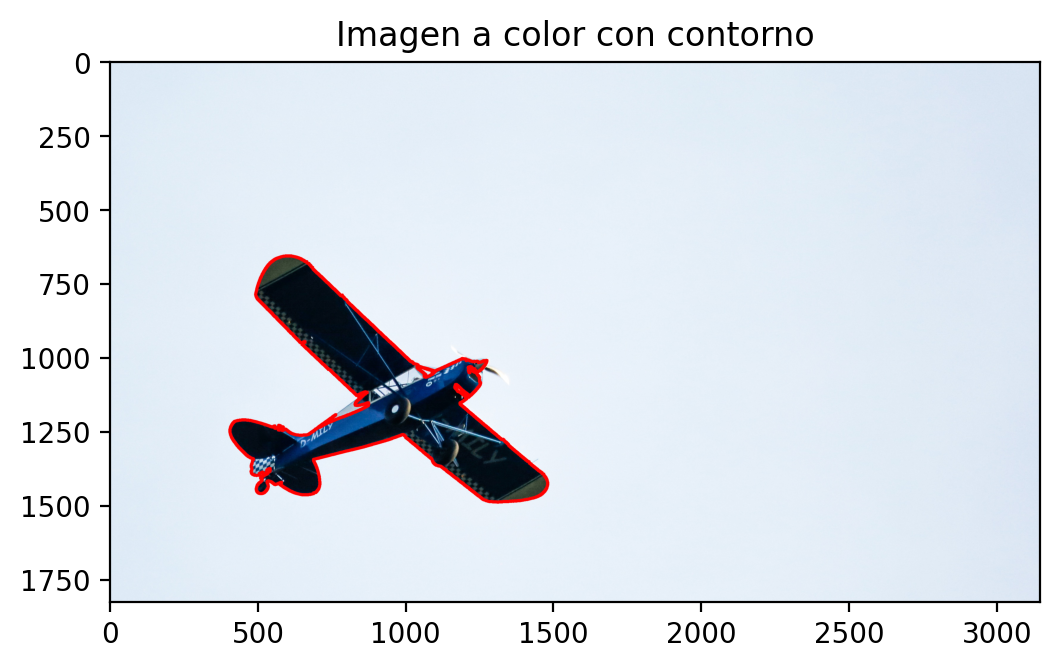

In [31]:
plt.imshow(cv2.drawContours(img_color.copy(), [contour], 0, (255, 0, 0), 10))
plt.title('Imagen a color con contorno');

##### Chequeo

In [32]:
importlib.reload(checker)
assert checker.check_contour(contour)

Calculaste el contorno correctamente. ¡Puedes seguir adelante!


## Chequeo final

La siguiente función revisará si los valores están correctos corriendo los mismos chequeos que antes.

Recuerda presionar _Validate_ arriba para que la plataforma corra todos los tests.

In [33]:
importlib.reload(checker)
assert checker.check_all(img_gray_shape, img_gray_min, img_gray_max, threshold,
                         img_bin_shape, img_bin_min, img_bin_max, plane_pixels,
                         total_pixels, bbox_x, bbox_y, bbox_w, bbox_h, contour)

Chequeando img_gray_shape
Tamaño correcto. ¡Puedes seguir adelante!
Chequeando img_gray_min
Mínimo correcto. ¡Puedes seguir adelante!
Chequeando img_gray_max
Máximo correcto. ¡Puedes seguir adelante!
Chequeando threshold
Buen valor de umbral. ¡Puedes seguir adelante!
Chequeando img_bin_shape
Tamaño correcto. ¡Puedes seguir adelante!
Chequeando img_bin_min
Mínimo correcto. ¡Puedes seguir adelante!
Chequeando img_bin_max
Máximo correcto. ¡Puedes seguir adelante!
Chequeando plane_pixels
Cantidad de pixeles del avión correcta. ¡Puedes seguir adelante!
Chequeando total_pixels
Cantidad total de pixeles correcta. ¡Puedes seguir adelante!
Chequeando bbox_x, bbox_y, bbox_w y bbox_h
Calculaste el bounding box correctamente. ¡Puedes seguir adelante!
Chequeando contour
Calculaste el contorno correctamente. ¡Puedes seguir adelante!

¡Felicitaciones! ¡Lograste completar el programa!
